In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [6]:
def Model2_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, lambda_4, gamma_11, gamma_12, gamma_21, gamma_22, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    Q4 = 0
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    AQ4 = 0 
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_JC = 0
    Matches_JE = 0
    
    # (can add in arrivals of C1 and C2 separately if needed)
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_JC = 0
    Arrivals_JE = 0
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_JC = 0
    Abandonment_JE = 0
    
     
    # Initalise vector to store the time 
    Time_v = []
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*5)
    EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = -(np.log(1-np.random.uniform(0, 1))/lambda_4)
    EC[4] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        
        iteration += 1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        AQ4 += ((TNEXT-TNOW)*Q4)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        
        # Next event is arrival of a class 1 CE (Q1)
        if(ENEXT==0):
            
            # Increase CE arrivals by 1
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 2 CEs to match with first check these
            if(Q3 > 0):
                
                # Loop through each C2 CE and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (C2 CE)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If no matches yet and there are C2 EEs to match with         
            if(Q4 > 0 and m==0):
                
                # Loop through each C2 EE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_11)))
                
                # Joins queue 
                Q1 += 1
                
        # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        # Next event is arrival of a class 1 EE (Q2)
        elif(ENEXT==1):
            
            # Increase EE arrivals by 1
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q4 > 0):
                
                # Loop through each JE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_EE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If no matches yet and there are JC to match with         
            if(Q3 > 0 and m==0):
                
                # Loop through each JC and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with JC and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and JC matches by 
                        Matches_EE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (JC)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_12)))
                
                # Joins queue 
                Q2 += 1
                
        # Update EC to include next arrival time of EE
            EC[1]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_2)
        
        # Next event is arrival of a class 2 CE (Q3)
        elif(ENEXT==2):
            
            # Increase JC arrivals by 1
            Arrivals_JC += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 1 CEs to match with first check these
            if(Q1 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q1 (C1 CE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If no matches yet and there are C1 EEs to match with         
            if(Q2 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_EE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C2 CE (Q3)
                EC=np.insert(EC, (5+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_21)))
                
                # Joins queue 
                Q3 += 1
                
        # Update EC to include next arrival time of CE
            EC[2]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is arrival of a class 2 EE (Q4)
        elif(ENEXT==3):
            
            # Increase EE arrivals by 1
            Arrivals_JE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q2 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # JE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_JE += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 CE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If no matches yet and there are CEs to match with         
            if(Q1 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase JE and CE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived Q4 (JE)
                EC=np.insert(EC, (5+Q1+Q2+Q3+Q4), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_22)))
                
                # Joins queue 
                Q4 += 1
                
            # Update EC to include next arrival time of EE
            EC[3]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_4)
            
            
        # Next event is abandonment of C1 CE Q1:
        elif((ENEXT>4) and (ENEXT <= (4+Q1))):
            
            # Q1 decreases by 1 
            Q1 -= 1 
            
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of C1 EE (Q2)
        elif((ENEXT>4+Q1) and (ENEXT <= (4+Q1+Q2))):
            
            # Q2 decreases by 1 
            Q2 -= 1 
            
            # Abandonment increases by 1
            Abandonment_EE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of JC (Q3)
        elif((ENEXT>4+Q1+Q2) and (ENEXT <= (4+Q1+Q2+Q3))):
            
            # Q3 decreases by 1 
            Q3 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JC += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next abandonment of JE (Q4)
        elif((ENEXT>4+Q1+Q2+Q3) and (ENEXT <= (4+Q1+Q2+Q3+Q4))):
            
            # Q4 decreases by 1 
            Q4 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JE += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        
       
            
    T_Q = AQ1 + AQ2 + AQ3 + AQ4
    
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
        
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_JC > 0):
        JCMatchRate = Matches_JC/Arrivals_JC
        JCAbandonRate = Abandonment_JC/Arrivals_JC
    else:
        JCMatchRate = 0
        JCAbandonRate = 0
    if(Arrivals_JE > 0):
        JEMatchRate = Matches_JE/Arrivals_JE
        JEAbandonRate = Abandonment_JE/Arrivals_JE
    else:
        JEMatchRate = 0
        JEAbandonRate = 0
    if(Arrivals_CE +Arrivals_EE+Arrivals_JC + Arrivals_JE > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_JE + Matches_JC)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_JC + Abandonment_JE)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_AQ4 = AQ4/TERM
    Av_Q_Total= T_Q/TERM
        
    return Av_AQ1, Av_AQ2, Av_AQ3, Av_AQ4, Av_Q_Total, CEMatchRate, EEMatchRate, JCMatchRate, JEMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JCAbandonRate, JEAbandonRate, TotalAbandonRate


            
            
        
        
        
        
        
        
        
                


        
        
                
        
                


                
        
                


In [7]:
print(datetime. now())
gamma11 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

CE_Match_rates = []
EE_Match_rates = []
JC_Match_rates = []
JE_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
JC_Abandon_rates = []
JE_Abandon_rates = []
JE_Match_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
JC_Queue_length = []
JE_Queue_length =[]
Total_Queue_length = []



for i in range(len(gamma11)):
    print(gamma11[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    JC_Rep_m_rate = []
    JE_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    JC_Rep_a_rate = []
    JE_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    JC_Rep_q_length = []
    JE_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(5):
        print(j)
        print(datetime. now())
        rep_results=Job_2type(0.75, 0.5, 1, 1, 1, 1, gamma11[i], 0.1, 0.05, 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[5])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[6])
        JC_Rep_m_rate = np.append(JC_Rep_m_rate, rep_results[7])
        JE_Rep_m_rate = np.append(JE_Rep_m_rate, rep_results[8])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[9])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[10])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[11])
        JC_Rep_a_rate = np.append(JC_Rep_a_rate, rep_results[12])
        JE_Rep_a_rate = np.append(JE_Rep_a_rate, rep_results[13])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[14])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        JC_Rep_q_length = np.append(JC_Rep_q_length, rep_results[2])
        JE_Rep_q_length = np.append(JE_Rep_q_length, rep_results[3])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[4])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    JC_Match_rates = np.append(JC_Match_rates, np.average(JC_Rep_m_rate))
    JE_Match_rates = np.append(JE_Match_rates, np.average(JE_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    JC_Abandon_rates = np.append(JC_Abandon_rates, np.average(JC_Rep_a_rate))
    JE_Abandon_rates = np.append(JE_Abandon_rates, np.average(JE_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    JC_Queue_length = np.append(JC_Queue_length, np.average(JC_Rep_q_length))
    JE_Queue_length = np.append(JE_Queue_length, np.average(JE_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(JC_Match_rates)
    print(JE_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(JC_Abandon_rates)
    print(JE_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(JC_Queue_length)
    print(JE_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-16 08:31:28.714657
0
0
0
2023-08-16 08:31:28.715855


/Users/corinnephillips/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in double_scalars


1
2023-08-16 08:31:43.442751
2
2023-08-16 08:31:56.095444
3
2023-08-16 08:32:08.773274
4
2023-08-16 08:32:22.533827
[0.99993344]
[0.88268863]
[0.94066202]
[0.9385637]
[0.94039289]
[0.]
[0.11727797]
[0.05929767]
[0.06140316]
[0.05956381]
[2.60803035]
[1.18080973]
[1.19782966]
[1.23752401]
[6.22419375]
0.1
1
0
2023-08-16 08:32:35.941095
1
2023-08-16 08:32:49.183421
2
2023-08-16 08:33:04.589877
3
2023-08-16 08:33:18.331908
4
2023-08-16 08:33:31.288480
[0.99993344 0.92109078]
[0.88268863 0.92120461]
[0.94066202 0.92279231]
[0.9385637  0.92279527]
[0.94039289 0.92196644]
[0.         0.07882966]
[0.11727797 0.07873501]
[0.05929767 0.07719446]
[0.06140316 0.07720473]
[0.05956381 0.07799522]
[2.60803035 0.78957268]
[1.18080973 0.78460947]
[1.19782966 1.55191646]
[1.23752401 1.5096037 ]
[6.22419375 4.63570231]
0.2
2
0
2023-08-16 08:33:44.542820
1
2023-08-16 08:33:57.682050
2
2023-08-16 08:34:11.023927
3
2023-08-16 08:34:24.527502
4
2023-08-16 08:34:38.459354
[0.99993344 0.92109078 0.89557403]
[

1
2023-08-16 08:43:52.197901
2
2023-08-16 08:44:12.835452
3
2023-08-16 08:44:30.451357
4
2023-08-16 08:44:46.844573
[0.99993344 0.92109078 0.89557403 0.88060312 0.86563912 0.8624012
 0.85333605 0.84606559 0.84489233 0.83731457]
[0.88268863 0.92120461 0.9339172  0.94352085 0.94727117 0.95220742
 0.95536453 0.95714435 0.96037345 0.96001274]
[0.94066202 0.92279231 0.91363794 0.90920695 0.90678878 0.90353509
 0.90264537 0.90320115 0.90026224 0.89866965]
[0.9385637  0.92279527 0.91239813 0.90923942 0.90675275 0.90395409
 0.90422434 0.90372452 0.90034481 0.90167617]
[0.94039289 0.92196644 0.91385502 0.91064172 0.90657828 0.90559655
 0.90389704 0.90259248 0.90138842 0.89943581]
[0.         0.07882966 0.10438582 0.11938342 0.13434757 0.1375988
 0.14666395 0.15392773 0.15510767 0.16267216]
[0.11727797 0.07873501 0.06606281 0.05647915 0.05272212 0.04777253
 0.04462879 0.04284901 0.03962655 0.03996073]
[0.05929767 0.07719446 0.08635542 0.09079305 0.09311828 0.09642506
 0.09729463 0.09673877 0.099

In [2]:
# Results

gamma11 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


CE_Match_rates = [0.99993344, 0.92109078, 0.89557403, 0.88060312, 0.86563912, 0.8624012, 0.85333605, 0.84606559, 0.84489233, 0.83731457, 0.83728154]
EE_Match_rates = [0.88268863, 0.92120461, 0.9339172, 0.94352085, 0.94727117, 0.95220742, 0.95536453, 0.95714435, 0.96037345, 0.96001274, 0.96290015]
JC_Match_rates = [0.94066202, 0.92279231, 0.91363794, 0.90920695, 0.90678878, 0.90353509, 0.90264537, 0.90320115, 0.90026224, 0.89866965, 0.89715445]
JE_Match_rates = [0.9385637, 0.92279527, 0.91239813, 0.90923942, 0.90675275, 0.90395409, 0.90422434, 0.90372452, 0.90034481, 0.90167617, 0.89840506]
Total_Match_rates = [0.94039289, 0.92196644, 0.91385502, 0.91064172, 0.90657828, 0.90559655, 0.90389704, 0.90259248, 0.90138842, 0.89943581, 0.89890404]
CE_Abandon_rates = [0.0, 0.07882966, 0.10438582, 0.11938342, 0.13434757, 0.1375988, 0.14666395, 0.15392773, 0.15510767, 0.16267216, 0.16270508]
EE_Abandon_rates = [0.11727797, 0.07873501, 0.06606281, 0.05647915, 0.05272212, 0.04777253, 0.04462879, 0.04284901, 0.03962655, 0.03996073, 0.03708642]
JC_Abandon_rates = [0.05929767, 0.07719446, 0.08635542, 0.09079305, 0.09311828, 0.09642506, 0.09729463, 0.09673877, 0.09969110, 0.10127033, 0.10277181]
JE_Abandon_rates = [0.06140316, 0.07720473, 0.08758856, 0.09068728, 0.09311357, 0.09599242, 0.09568253, 0.09623557, 0.09956895, 0.09831044, 0.10156846]
Total_Abandon_rates = [0.05956381, 0.07799522, 0.08612497, 0.08933659, 0.09336003, 0.09437512, 0.09606295, 0.09737920, 0.09857827, 0.10053587, 0.10106430]
CE_Queue_length = [2.60803035, 0.78957268, 0.52486704, 0.39618388, 0.33760144, 0.2740303, 0.24260143, 0.21920403, 0.19451877, 0.17979182, 0.16302276]
EE_Queue_length = [1.18080973, 0.78460947, 0.64834838, 0.56695369, 0.5287383, 0.47863303, 0.44464146, 0.43637363, 0.39625924, 0.39619388, 0.37352320]
JC_Queue_length = [1.19782966, 1.55191646, 1.72418532, 1.82971828, 1.84427222, 1.95616003, 1.97041578, 1.92402921, 2.03687396, 1.99385393, 2.04859261]
JE_Queue_length = [1.23752401, 1.5096037, 1.74046278, 1.82279303, 1.83918261, 1.91816742, 1.93429076, 1.92737577, 2.00460816, 1.97772307, 2.02749982]
Total_Queue_length = [6.22419375, 4.63570231, 4.63786353, 4.61564888, 4.54979458, 4.62699077, 4.59194942, 4.50698265, 4.63226013, 4.5475627, 4.61263839]


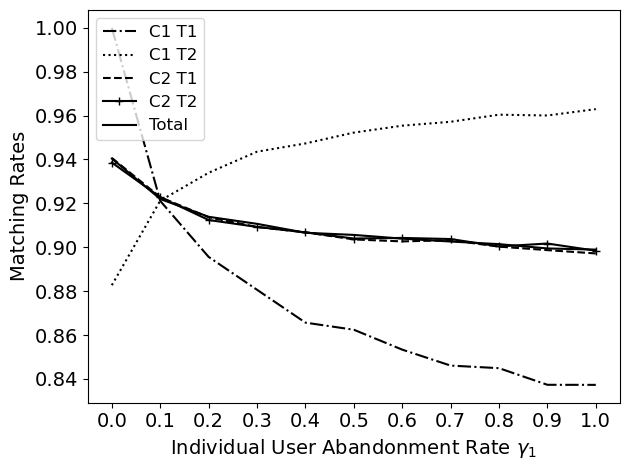

In [3]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_1$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(gamma11, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(gamma11, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(gamma11, JC_Match_rates,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(gamma11, JE_Match_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(gamma11, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma11, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp15_Match.png')
plt.show()

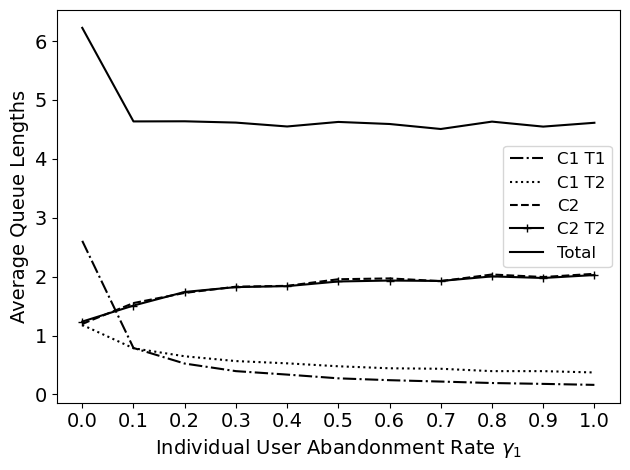

In [4]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_1$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(gamma11, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(gamma11, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(gamma11, JC_Queue_length,  linestyle='dashed', label = 'C2', color='black')
plt.plot(gamma11, JE_Queue_length,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(gamma11, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma11, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp15_Queue.png')
plt.show()



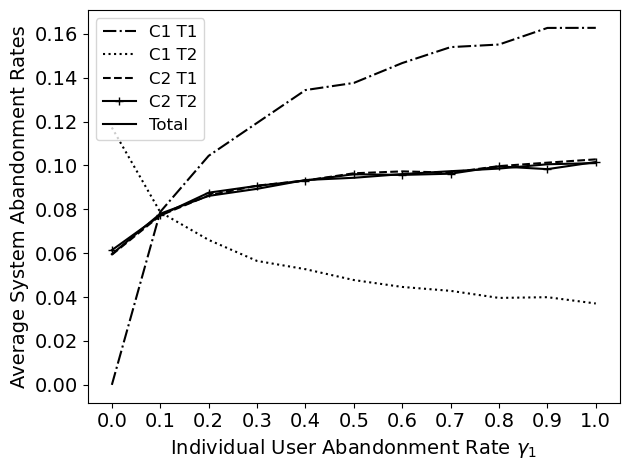

In [5]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_1$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(gamma11, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(gamma11, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(gamma11, JC_Abandon_rates, linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(gamma11, JE_Abandon_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(gamma11, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma11, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp15_Abandon.png')
plt.show()



